# **Kickstarter Project Success Prediction**

**Project Summary**: Predicting the success of Kickstarter projects by analyzing various features such as project category, main category, funding goal, and more. This project aims to build a machine learning model using Kickstarter data to predict whether a project will be successful, failed, or canceled based on its attributes.


**Steps in the Project**

1. **Data Loading and Preparation**: Load Kickstarter project data, manage missing values, and convert relevant categorical fields for analysis.

2. **Exploratory Data Analysis (EDA)**: Investigate key features (e.g., category, main category, goal) to understand their distributions and relationships with project outcomes.

3. **Model Training**: Use a classification algorithm to predict project success. Train the model on project features to distinguish successful projects from failed or canceled ones.

4. **Evaluation**: Assess model performance using accuracy metrics and identify influential features contributing to successful outcomes.

**Outcomes and Insights**

- **Model Performance**: A reliable prediction model that can classify projects by outcome, potentially supporting Kickstarter users in decision-making.
  
- **Feature Importance**: Analysis shows which features (like funding goal or category) significantly impact project outcomes, offering valuable guidance for project planning.

This project is beneficial for both project creators and backers interested in understanding the factors that drive Kickstarter project success, and it provides a foundation for future research on crowdfunding success factors.

In [114]:
## Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import pickle

In [167]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
file_path = '/content/drive/My Drive/kickstarter_projects_for_ml.csv'
data = pd.read_csv(file_path)

# Display part of the dataset
data.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,name,category,main_category,goal,state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,1000,failed
1,1000004038,Where is Hank?,Narrative Film,Film & Video,45000,failed
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000,failed
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,19500,canceled
4,1000014025,Monarch Espresso Bar,Restaurants,Food,50000,successful
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,1000,successful
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,25000,failed
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,125000,canceled
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,65000,canceled
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,2500,failed


In [168]:
# Check for the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
ID                int64
name             object
category         object
main_category    object
goal             object
state            object
dtype: object


In [169]:
# Data set full summary
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5001 non-null   int64 
 1   name           5001 non-null   object
 2   category       5001 non-null   object
 3   main_category  5001 non-null   object
 4   goal           5001 non-null   object
 5   state          5001 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None


In [170]:
#Data summary
print(data.describe())

                 ID
count  5.001000e+03
mean   9.230892e+08
std    2.770752e+08
min    1.000100e+04
25%    1.004860e+09
50%    1.013385e+09
75%    1.021612e+09
max    1.029974e+09


In [171]:

#check if there are missing values
print(data.isnull().sum())

ID               0
name             0
category         0
main_category    0
goal             0
state            0
dtype: int64


In [173]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'goal', 'state'], dtype='object')

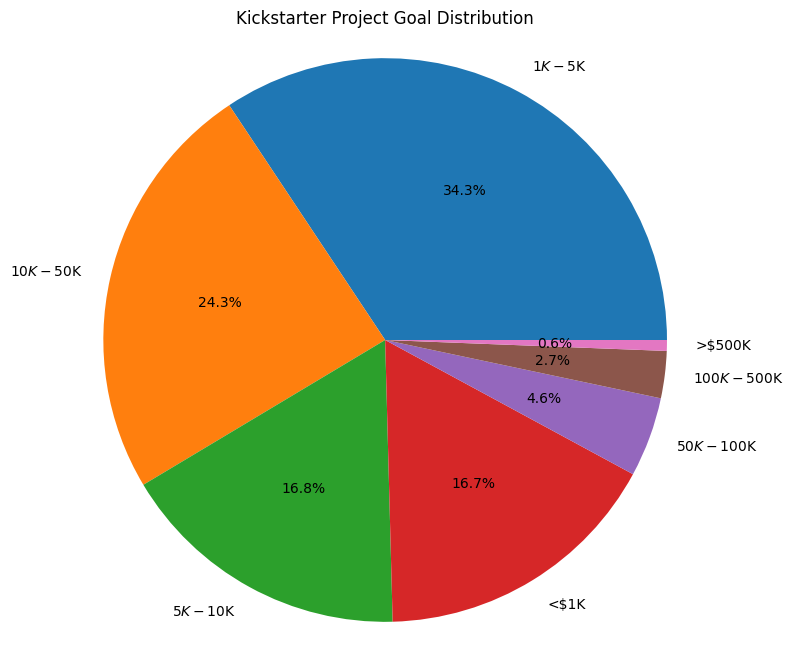

In [205]:
# Clean the 'goal' column
df['goal'] = pd.to_numeric(df['goal'], errors='coerce')
df['goal'] = df['goal'].fillna(0)

# Count the number of projects for each goal range
goal_ranges = pd.cut(df['goal'], bins=[-1, 1000, 5000, 10000, 50000, 100000, 500000, np.inf], labels=['<$1K', '$1K-$5K', '$5K-$10K', '$10K-$50K', '$50K-$100K', '$100K-$500K', '>$500K'])
goal_counts = goal_ranges.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(goal_counts, labels=goal_counts.index, autopct='%1.1f%%')
plt.title('Kickstarter Project Goal Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()

In [192]:
# See data columns

data.columns

Index(['name', 'category', 'main_category', 'state'], dtype='object')

In [193]:
# Drop the 'ID' and 'goal' columns if they are unnecessary for modeling
data = data.drop(columns=['ID', 'goal'], errors='ignore')

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['name', 'category', 'main_category', 'state']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [194]:
data.head()

,name,category,main_category,state
0,4345,114,18,10
1,4771,99,8,10
2,4515,96,14,10
3,968,62,8,9
4,2665,127,9,12


In [195]:
# Define features and target variable for Kickstarter data
X = data.drop(columns=['state'])  # Drop the target column from features
y = data['state']  # Set the target variable


In [196]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [197]:

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [198]:
#save the trained model
pickle.dump(model, open('kickstarter_model.pkl', 'wb'))

Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.14      0.09      0.11       104
          10       0.53      0.56      0.54       521
          11       0.00      0.00      0.00        13
          12       0.41      0.42      0.42       346
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        12

    accuracy                           0.45      1001
   macro avg       0.13      0.13      0.13      1001
weighted avg       0.43      0.45      0.44      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


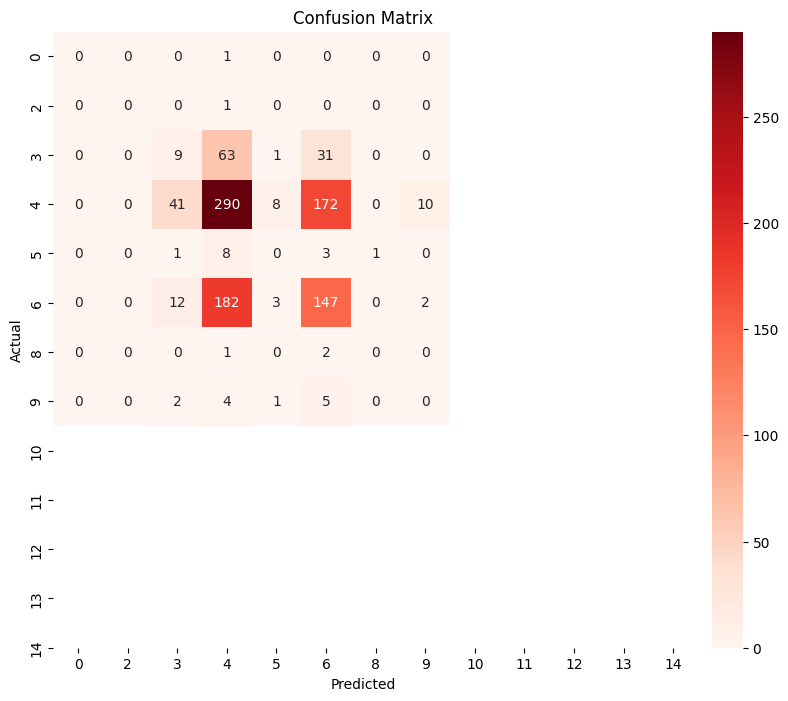

In [203]:
# Model Evaluation

# Make predictions
y_prediction = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_prediction))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


                                                                            
                                                    ©2024 Mohamed Ahmed Yasin